## Burst processing example

B:\dev\sadtrombone\example\driftrate.py:100: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[0:nx,:] = result_shifted[nx-1:2*nx-1,:]
B:\dev\sadtrombone\example\driftrate.py:101: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[nx:2*nx-1,:] = result_shifted[0:nx-1,:]


finding fit CHIME1...
solution nlsq: [ 6.90766003e+03  8.04738994e+01  2.55863942e+02  3.34313271e+00
  4.97749345e+01 -3.06201338e+00]


B:\dev\sadtrombone\example\driftrate.py:174: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gray"))
  cmap.set_bad(color = 'w', alpha = 1.)


,amplitude,xo,yo,sigmax,sigmay,theta,amp_error,xo_error,yo_error,sigmax_error,sigmay_error,angle_error,drift (mhz/ms),drift error (mhz/ms),angle,center_f,red_chisq,time_res,freq_res
CHIME1,6907.66,80.4739,255.864,3.34313,49.7749,-3.06201,10.1574,0.00760747,0.0729643,0.00491606,0.0731949,0.000140305,-19.9311,0.035289,-4.63281,632.403,3.71036,0.00098304,1.5625


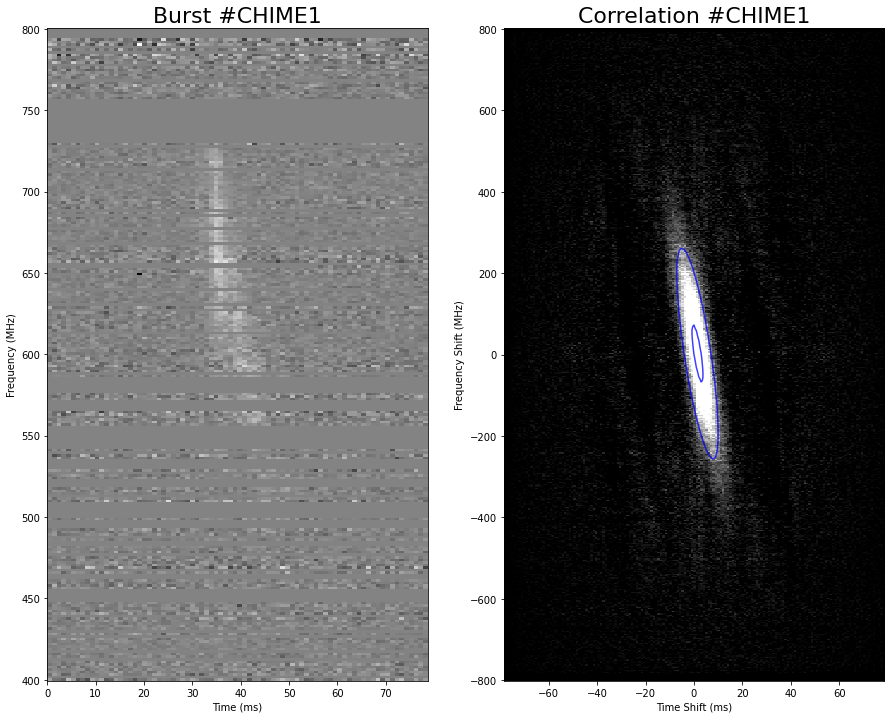

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import driftrate, driftlaw

burst = np.load('frb180916_burst18.npy')

# CHIME spectral parameters
params = {
    'dt_s'            : 0.00098304,
    'df_mhz'          : 400/burst.shape[0],
    'nchan'           : burst.shape[0],
    'freq_bottom_mhz' : 400.1953125,
    'freq_top_mhz'    : 800.1953125,
    'dm'              : 348.82
}

targetDM = 348.82
ddm = targetDM - params['dm']
burstid = 'CHIME1'
burst = driftrate.dedisperse(burst, ddm, params['freq_bottom_mhz'], params['df_mhz'], params['dt_s']*1000)    
drift, drift_error, popt, perr, theta, red_chisq, center_f = driftrate.processBurst(burst, burstid, params['df_mhz'], params['dt_s']*1000, params['freq_bottom_mhz'], p0=[])
# plt.savefig('{}corr.png'.format(burstid))

# Export to csv using pandas
outputdata = pd.DataFrame(index=[burstid], 
                          columns=['amplitude', 'xo', 'yo', 'sigmax', 'sigmay', 'theta', 'amp_error', 'xo_error', 'yo_error', 'sigmax_error', 'sigmay_error', 'angle_error',
                                  'drift (mhz/ms)', 'drift error (mhz/ms)', 'angle', 'center_f', 'red_chisq', 'time_res', 'freq_res'])

outputdata.loc['CHIME1'] = [*popt, *perr, drift, drift_error, theta, center_f, red_chisq, params['dt_s'], params['df_mhz']]
outfile = 'outputexample.csv'
outputdata.to_csv(outfile, index_label="name")
outputdata

## Compute Dynamical Model Values

In [16]:
bursts180916 = pd.read_csv('outputexample.csv') 
bursts180916 = bursts180916.set_index('name')
bursts180916['time_res'] = 0.00098304 # s
bursts180916['z']  = 0.0337  # (chime 2020b et al.)


bursts180916 = driftlaw.computeModelDetails(bursts180916)
bursts180916

,amplitude,xo,yo,sigmax,sigmay,theta,amp_error,xo_error,yo_error,sigmax_error,...,max_sigma,min_sigma_error,max_sigma_error,sigma_t,tau_w,tau_w_error,sigma_t_ms,tau_w_ms,drift_z,tau_w_ms_z
name,,,,,,,,,,,,,,,,,,,,,
CHIME1,6907.660032,80.473899,255.863942,3.343133,49.774934,-3.062013,10.157365,0.007607,0.072964,0.004916,...,49.774934,0.004916,0.073195,0.003286,0.003297,0.004848,3.286433,3.29682,0.032579,3.189339
